In [117]:
from Engine.Tools import phiFunction, relativeAngle, distanceCalc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import product
import numpy as np
import random

In [118]:
# Simulation setup
random.seed(123)
N: int = 1000                                                          # Simulation size
Lag: int = 1                                                           # Lag value in the model
Phi: float = 0.8
Rho: float = 0.03
timeInterval: int = 1
meanPol: float = 10.0

In [119]:
# Geographical setup
GridSize: list = [x for x in range(-1, 2)]                                           # Size of the geographical grid for the simulation
Distance: float = 1.0                                                                # in Km
Location: dict = {i: x for i, x in enumerate(list(product(GridSize, repeat=2)))}     # Dictionary of coordinates for each integer-valued intersection point in the grid

In [120]:
# Environmental Setup
windSpeed: np.ndarray = np.clip(np.random.normal(loc=30.0, scale=10.0, size=[N]), 1.0, np.inf)               # Random non-negative wind speed


In [ ]:
# windDirection: np.ndarray = np.degrees(np.arccos(np.cos(np.linspace(0, 2 * np.pi, N, endpoint=False))))    # Sequential wind direction 
# windDirection: np.ndarray = np.random.uniform(low=0, high=360, size=[N])                                   # Random wind direction 
windDirection

In [121]:
# Simulating variables
K: int = len(GridSize) ** 2
initialPollution: float = np.random.normal(loc=50, scale=2.5, size=[1, K])    

# Computing the Phi function values
W: np.ndarray = np.zeros((N, K, K))
for k in range(N):
    for pair in product(list(Location.keys()), repeat=2):
        i, j = pair
        W[k, i, j] = 0 if i == j else phiFunction(
            phi=Phi,
            rho=Rho,
            distance=distanceCalc(coordinateA=Location[i], coordinateB=Location[j], unit=Distance),
            n=timeInterval,
            velocity=windSpeed[k],
            angle=relativeAngle(coordinateA=Location[i], coordinateB=Location[j], windDir=windDirection[k]),
            lag=Lag
        )
    rowNorms: np.ndarray = np.linalg.norm(W[k, :, :], axis=1)
    rowNorms[rowNorms == 0] = 1
    W[k, :, :] = W[k, :, :] / rowNorms[:, np.newaxis]

In [122]:
# Random initial pollution level
Y: np.ndarray = np.zeros([N, K])
Y[0, :] = meanPol + initialPollution
for i in range(1, N):
    Y[i, :] = meanPol + W[i, :, :] @ Y[i-1, :].transpose() + np.random.normal(loc=0, scale=1, size=[1, K])

/var/folders/7f/x1mp2wjd10vcy_krqb5_kwjc0000gn/T/ipykernel_60475/2712503530.py:5: RuntimeWarning: overflow encountered in matmul
  Y[i, :] = meanPol + W[i, :, :] @ Y[i-1, :].transpose() + np.random.normal(loc=0, scale=1, size=[1, K])
/var/folders/7f/x1mp2wjd10vcy_krqb5_kwjc0000gn/T/ipykernel_60475/2712503530.py:5: RuntimeWarning: invalid value encountered in matmul
  Y[i, :] = meanPol + W[i, :, :] @ Y[i-1, :].transpose() + np.random.normal(loc=0, scale=1, size=[1, K])


In [123]:
Y

array([[ 60.2124702 ,  65.60662796,  62.70632197, ...,  59.05325769,
         60.99085462,  55.95284912],
       [183.64155169, 184.84277593, 183.91850618, ..., 185.67072696,
        185.3213121 , 185.96590998],
       [532.63247871, 533.62723904, 533.28755373, ..., 531.90043641,
        532.77473051, 531.19712263],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

/var/folders/7f/x1mp2wjd10vcy_krqb5_kwjc0000gn/T/ipykernel_60475/2062200356.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


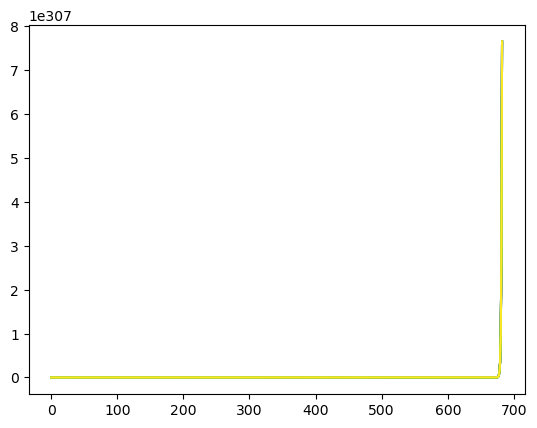

In [124]:
fig, ax = plt.subplots()

# Get a color map
cmap = cm.get_cmap('viridis')

# Generate colors from the color map
colors = [cmap(i) for i in np.linspace(0, 1, Y.shape[1])]

# Plot each column with a unique color
for i in range(Y.shape[1]):
    ax.plot(Y[:, i], color=colors[i])

plt.show()